## AI/ML Internship

#### Task 8: Clustering with K-Means

#### 1. Importing necessary Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#### 2. Load the Data

In [3]:
mall_customer_data = pd.read_csv('Mall_Customers.csv')
mall_customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
mall_customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
mall_customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# checking null values
mall_customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### 3. Preprocessing the Data 

In [8]:
# Selecting features for clustering
X = mall_customer_data[['Annual Income (k$)', 'Spending Score (1-100)']]

#### 4. Using PCA for 2D Visualization

In [9]:
# Standardize data
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X_scaled = StandardScaler().fit_transform(mall_customer_data[features])

In [10]:
# Reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [11]:
# KMeans on PCA data
kmeans_pca = KMeans(n_clusters=5, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca)

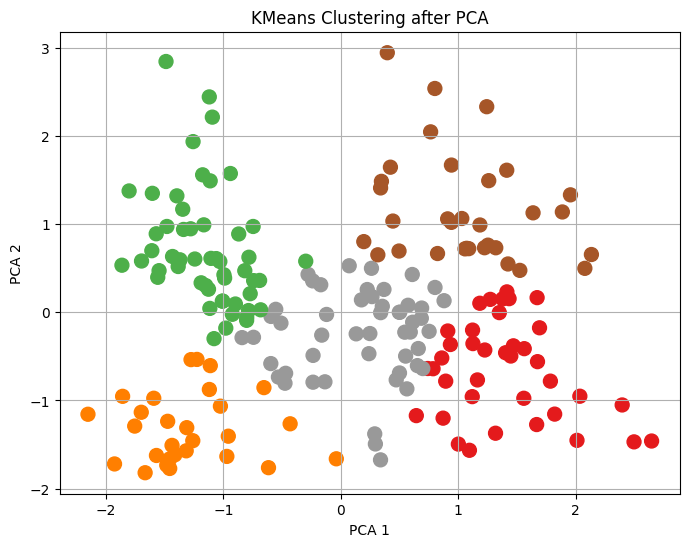

In [12]:
# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, cmap='Set1', s=100)
plt.title('KMeans Clustering after PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

#### 5. Elbow Method to Determine Optimal K 

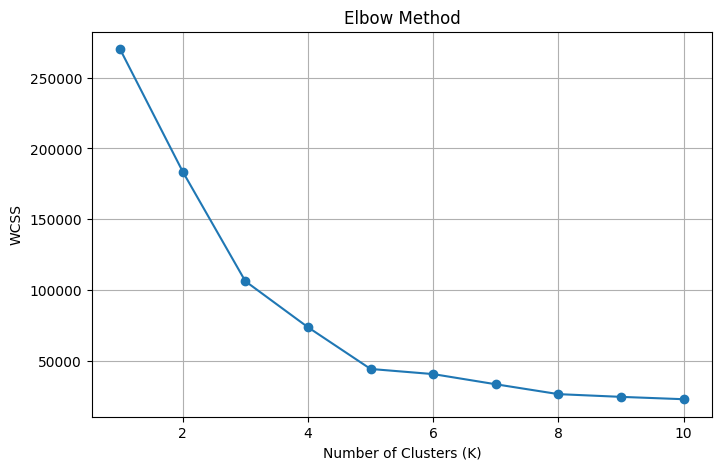

In [13]:
wcss = [] 

# Trying different values of K
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

#### 6. Fit K-Means and Assign Cluster Labels

In [14]:
# Fit KMeans with optimal K
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add cluster labels to the original DataFrame
mall_customer_data['Cluster'] = y_kmeans

#### 7. Visualize Clusters with Color Coding

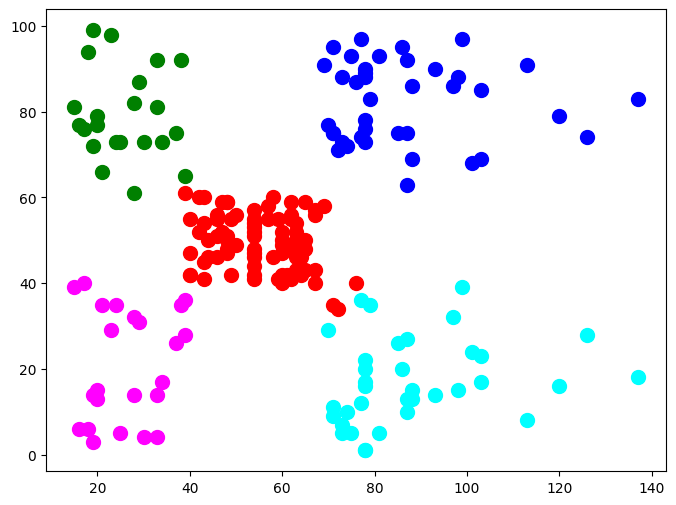

In [15]:
# Plot the clusters
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(5):
    plt.scatter(X[y_kmeans == i]['Annual Income (k$)'],
                X[y_kmeans == i]['Spending Score (1-100)'],
                s=100, c=colors[i], label=f'Cluster {i}')


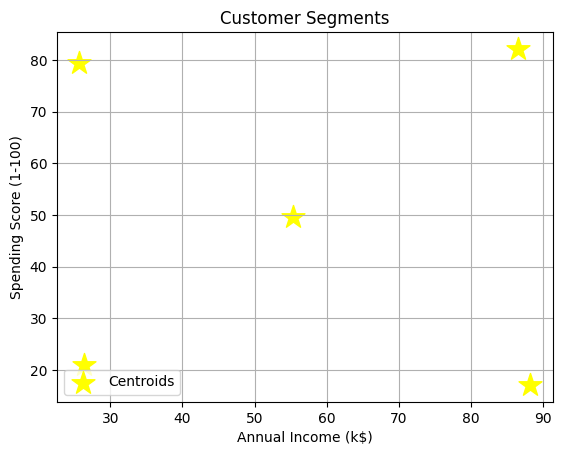

In [16]:
# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids', marker='*')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

#### 8. Evaluate Clustering using Silhouette Score

In [17]:
# Evaluate clustering
score = silhouette_score(X, y_kmeans)
print(f'Silhouette Score: {score:.4f}')

Silhouette Score: 0.5539


### Conclusion

**In this task, we used K-Means clustering on the Mall Customers dataset to cluster customers with regard to Annual Income and Spending Score. Based on the Elbow Method, we identified the best number of clusters (K=5), and represented the segments of customers with separate color-coded clusters. The Silhouette Score validated the goodness of the clustering. This analysis assists in the comprehension of various groups of customers for focused marketing strategies. Optional, we applied PCA for reducing dimensions when there were more features involved, allowing for good visualization and clustering in 2D.**